# Healthcare Trends Analysis Using Public Health Data

## Introduction
This project analyzes publicly available healthcare data from the Centers for Disease Control and Prevention (CDC) to identify trends in influenza vaccine distribution. The objective is to provide insights into potential high-risk periods and improve public health resource allocation.

## Dataset
The dataset used in this analysis can be accessed from the CDC API:  
**API Link:** [CDC Flu Vaccine Dataset](https://data.cdc.gov/resource/e5zk-7tx5.csv)  
**Key Columns:**  
- `season`: The flu season.
- `month`: The month of distribution.
- `week`: The week of distribution.
- `cumulative_flu_doses`: Total cumulative doses distributed.

In [1]:
import pandas as pd

## Load the Dataset
Load data from the CDC API.

In [2]:
# Load data from CDC API
url = "https://data.cdc.gov/resource/e5zk-7tx5.csv"
df = pd.read_csv(url)

# Display the first few rows
df.head()

,season,month,month_number,week,month_week_label,month_week_sort_order,cumulative_flu_doses,imputed_value,current_through
0,2016-2017,August,2,1,August wk 1,21,NaN,False,2021-09-24T00:00:00.000
1,2016-2017,August,2,2,August wk 2,22,NaN,False,2021-09-24T00:00:00.000
2,2016-2017,August,2,3,August wk 3,23,NaN,False,2021-09-24T00:00:00.000
3,2016-2017,August,2,4,August wk 4,24,NaN,False,2021-09-24T00:00:00.000
4,2016-2017,September,3,1,September wk 1,31,52.7,False,2021-09-24T00:00:00.000


## Data Overview
Check column names and data types, and check for missing values.

In [3]:
#Check the column names and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   season                 176 non-null    object 
 1   month                  176 non-null    object 
 2   month_number           176 non-null    int64  
 3   week                   176 non-null    int64  
 4   month_week_label       176 non-null    object 
 5   month_week_sort_order  176 non-null    int64  
 6   cumulative_flu_doses   151 non-null    float64
 7   imputed_value          176 non-null    bool   
 8   current_through        176 non-null    object 
dtypes: bool(1), float64(1), int64(3), object(4)
memory usage: 11.3+ KB


In [4]:
#Check for missing values
df.isnull().sum()

season                    0
month                     0
month_number              0
week                      0
month_week_label          0
month_week_sort_order     0
cumulative_flu_doses     25
imputed_value             0
current_through           0
dtype: int64

## Data Cleaning
Drop unnecessary columns and fill missing values in cumulative_flu_doses.

In [5]:
# Drop unnecessary columns
df = df.drop(columns=['imputed_value', 'current_through'])

# Fill missing values in cumulative_flu_doses with the mean (or median)
df['cumulative_flu_doses'].fillna(df['cumulative_flu_doses'].mean(), inplace=True)

# Verify if missing values are handled
df.isnull().sum()

season                   0
month                    0
month_number             0
week                     0
month_week_label         0
month_week_sort_order    0
cumulative_flu_doses     0
dtype: int64

## Exploratory Data Analysis (EDA)
Basic statistics and unique seasons & months.

In [6]:
# Basic Statistics

df.describe()

,month_number,week,month_week_sort_order,cumulative_flu_doses
count,176.000000,176.000000,176.000000,176.000000
mean,5.181818,2.454545,54.272727,142.500000
std,2.130301,1.120297,21.250467,39.529994
min,2.000000,1.000000,21.000000,5.400000
25%,3.000000,1.000000,34.000000,138.800000
50%,5.000000,2.000000,53.000000,148.200000
75%,7.000000,3.000000,72.250000,169.100000
max,9.000000,4.000000,92.000000,195.300000


In [7]:
# Check Unique Seasons & Months

print("Unique Seasons:", df['season'].unique())
print("Unique Months:", df['month'].unique())

Unique Seasons: ['2016-2017' '2017-2018' '2018-2019' '2019-2020' '2020-2021' '2021-2022']
Unique Months: ['August' 'September' 'October' 'November' 'December' 'January' 'February'
 'March']


## Visualizing Cumulative Flu Doses Over Time

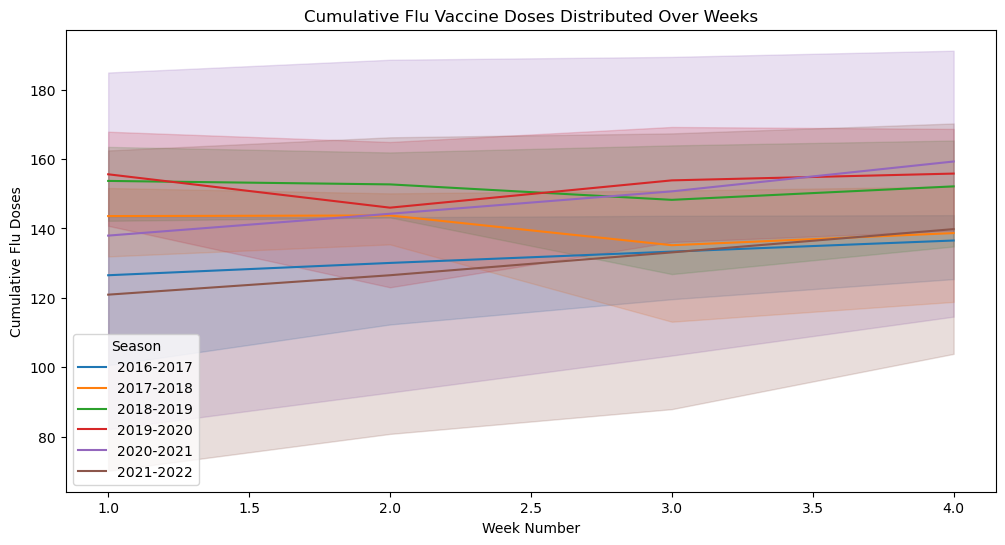

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x=df['week'], y=df['cumulative_flu_doses'], hue=df['season'])
plt.title("Cumulative Flu Vaccine Doses Distributed Over Weeks")
plt.xlabel("Week Number")
plt.ylabel("Cumulative Flu Doses")
plt.legend(title="Season")
plt.show()

## Identifying Weeks with Lowest Flu Vaccine Distribution

In [9]:
low_vaccine_weeks = df.nsmallest(10, 'cumulative_flu_doses')
low_vaccine_weeks

,season,month,month_number,week,month_week_label,month_week_sort_order,cumulative_flu_doses
148,2021-2022,August,2,1,August wk 1,21,5.4
120,2020-2021,August,2,1,August wk 1,21,5.7
149,2021-2022,August,2,2,August wk 2,22,11.5
121,2020-2021,August,2,2,August wk 2,22,13.2
150,2021-2022,August,2,3,August wk 3,23,24.0
122,2020-2021,August,2,3,August wk 3,23,25.2
151,2021-2022,August,2,4,August wk 4,24,39.9
123,2020-2021,August,2,4,August wk 4,24,45.2
4,2016-2017,September,3,1,September wk 1,31,52.7
152,2021-2022,September,3,1,September wk 1,31,53.2


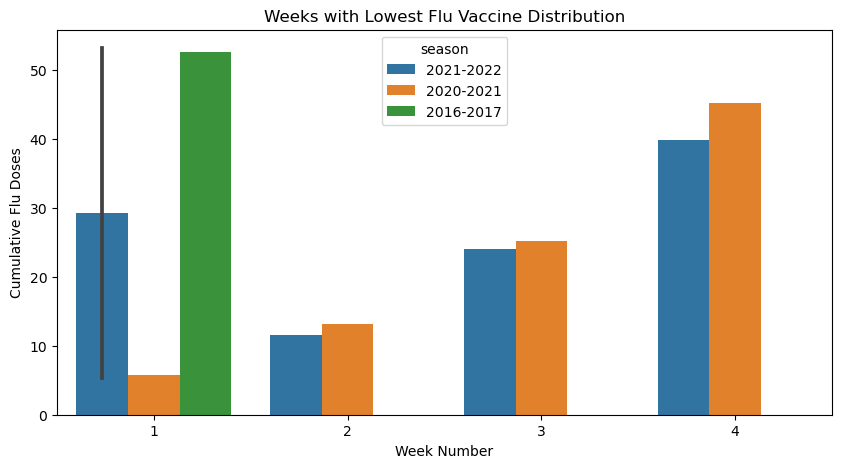

In [10]:
plt.figure(figsize=(10, 5))
sns.barplot(x=low_vaccine_weeks['week'], y=low_vaccine_weeks['cumulative_flu_doses'], hue=low_vaccine_weeks['season'])
plt.title("Weeks with Lowest Flu Vaccine Distribution")
plt.xlabel("Week Number")
plt.ylabel("Cumulative Flu Doses")
plt.show()

## Conclusion
The analysis provides insights into the distribution of influenza vaccines over the weeks of various flu seasons. Identifying weeks with low vaccination rates can help public health officials better allocate resources and improve vaccination campaigns.

## Usage
To run this analysis, simply execute each cell in the notebook in your preferred environment.